<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-Learning/blob/main/MLAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

data = pd.read_csv('house_price.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#Q1. Perform basic EDA (Score:1)


In [98]:
# Display dataset information
print("Dataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing and duplicate values
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000   

In [70]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


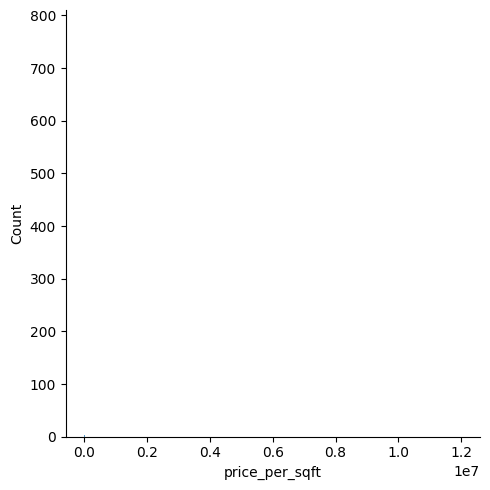

In [71]:
sns.displot(data['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

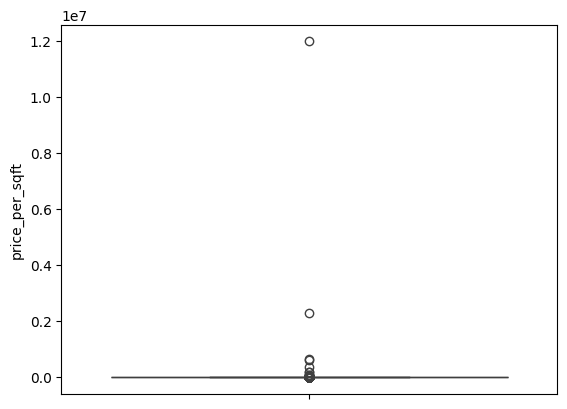

In [72]:
#to see outliers clearly
sns.boxplot(data['price_per_sqft'])

#Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
a) Mean and Standard deviation

b)Percentile method

c) IQR(Inter quartile range method)

d) Z Score method


#Z score

In [74]:
upper_limit = data['price_per_sqft'].mean() + 3*data['price_per_sqft'].std()
lower_limit = data['price_per_sqft'].mean() - 3*data['price_per_sqft'].std()
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 328101.8177267496
lower limit: -312261.1442419011


In [75]:
#find outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [77]:
#trimming- delete the outlier data
new_data = data.loc[(data['price_per_sqft']< upper_limit) & (data['price_per_sqft']> lower_limit)]
print("Before removing outliers:",len(data))
print("After removing outliers:", len(new_data))
print("outliers:",len(data)-len(new_data))

Before removing outliers: 13200
After removing outliers: 13195
outliers: 5


<Axes: xlabel='price_per_sqft'>

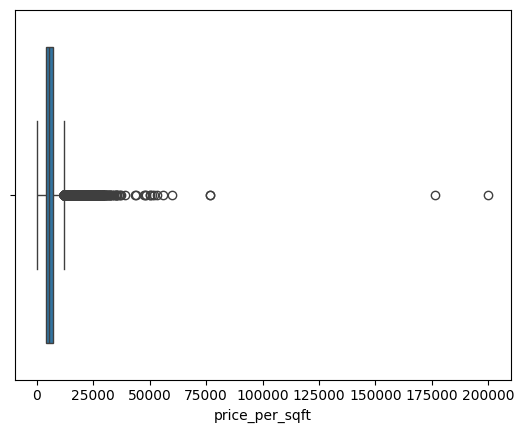

In [79]:
sns.boxplot(x=new_data['price_per_sqft'])

In [85]:
#capping - change the outlier value to upper (or)  lower limit values
new_data = data.copy()
new_data.loc[(new_data['price_per_sqft']> upper_limit), 'price_per_sqft'] = upper_limit
new_data.loc[(new_data['price_per_sqft']< lower_limit), 'price_per_sqft'] = lower_limit


<ipython-input-85-376e2adefe08>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267496' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[(new_data['price_per_sqft']> upper_limit), 'price_per_sqft'] = upper_limit


13200

<Axes: xlabel='price_per_sqft'>

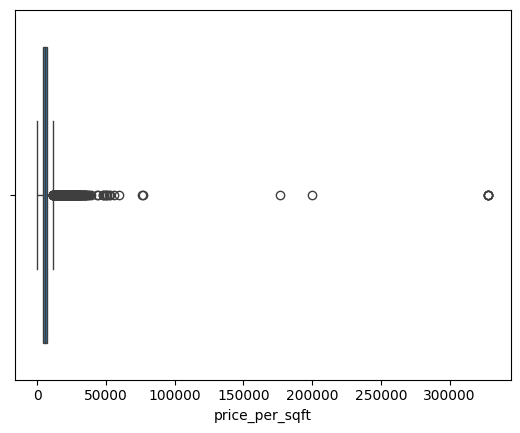

In [81]:
sns.boxplot(x=new_data['price_per_sqft'])

## IQR methode


In [87]:
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)
iqr = q3-q1
print("Q1",q1)
print("Q3",q3)
print("IQR",iqr)

Q1 4267.0
Q3 7317.0
IQR 3050.0


In [89]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 11892.0
lower limit: -308.0


<Axes: xlabel='price_per_sqft'>

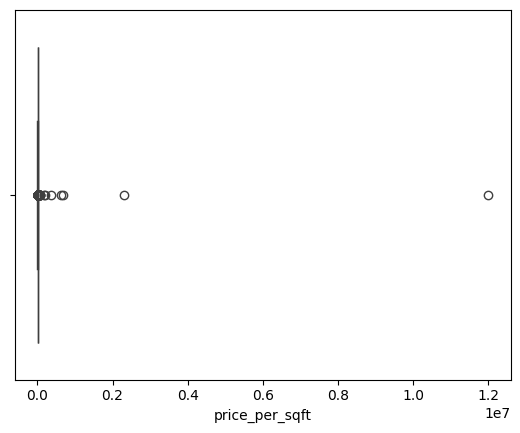

In [90]:
sns.boxplot(x=data['price_per_sqft'])

In [91]:
#find outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [92]:
#trimming- delete the outlier data
new_data = data.loc[(data['price_per_sqft']< upper_limit) & (data['price_per_sqft']> lower_limit)]
print("Before removing outliers:",len(data))
print("After removing outliers:", len(new_data))
print("outliers:",len(data)-len(new_data))

Before removing outliers: 13200
After removing outliers: 11935
outliers: 1265


<Axes: xlabel='price_per_sqft'>

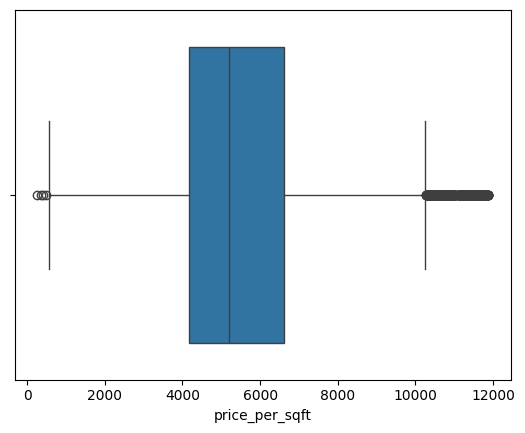

In [93]:
sns.boxplot(x=new_data['price_per_sqft'])

In [95]:
#capping - change the outlier value to upper (or)  lower limit values
new_data = data.copy()
new_data.loc[(new_data['price_per_sqft']> upper_limit), 'price_per_sqft'] = upper_limit
new_data.loc[(new_data['price_per_sqft']< lower_limit), 'price_per_sqft'] = lower_limit

<Axes: xlabel='price_per_sqft'>

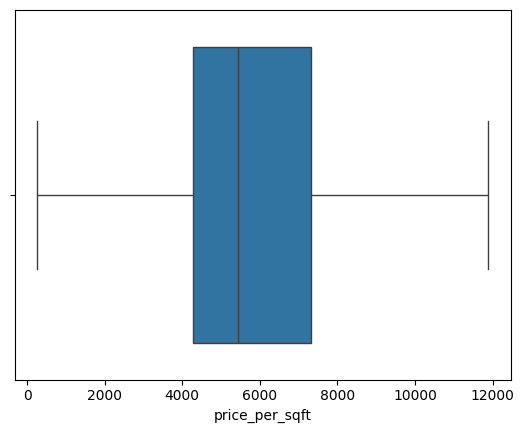

In [96]:
sns.boxplot(x=new_data['price_per_sqft'])

##Percentile method

In [99]:
upper_limit = data['price_per_sqft'].quantile(0.99)
lower_limit = data['price_per_sqft'].quantile(0.01)
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 23674.45000000001
lower limit: 2549.0


<Axes: xlabel='price_per_sqft'>

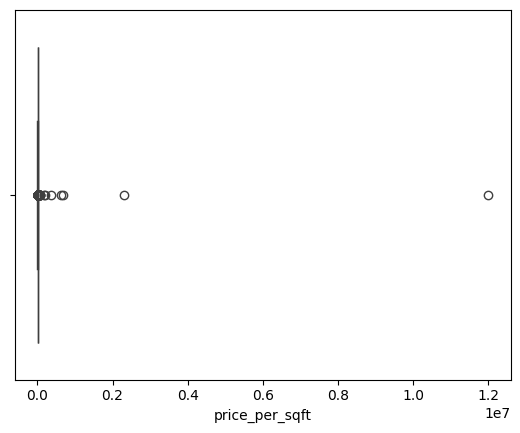

In [101]:
sns.boxplot(x=data['price_per_sqft'])

In [102]:
#find outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [104]:
#trimming- delete the outlier data
new_data = data.loc[(data['price_per_sqft']<= upper_limit) & (data['price_per_sqft']>= lower_limit)]
print("Before removing outliers:",len(data))
print("After removing outliers:", len(new_data))
print("outliers:",len(data)-len(new_data))

Before removing outliers: 13200
After removing outliers: 12941
outliers: 259


<Axes: xlabel='price_per_sqft'>

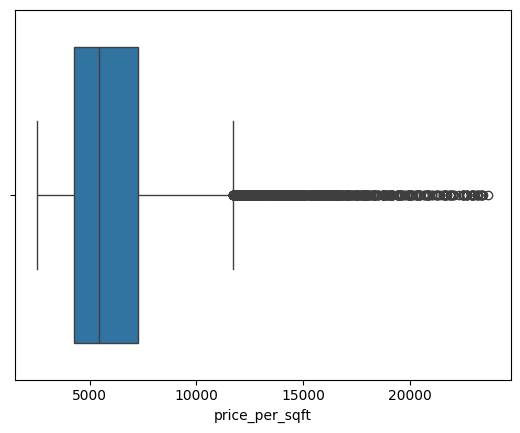

In [105]:
sns.boxplot(x=new_data['price_per_sqft'])

In [106]:
#capping - change the outlier value to upper (or)  lower limit values
new_data = data.copy()
new_data.loc[(new_data['price_per_sqft']> upper_limit), 'price_per_sqft'] = upper_limit
new_data.loc[(new_data['price_per_sqft']< lower_limit), 'price_per_sqft'] = lower_limit

<ipython-input-106-c58de4eb5060>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23674.45000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[(new_data['price_per_sqft']> upper_limit), 'price_per_sqft'] = upper_limit


<Axes: xlabel='price_per_sqft'>

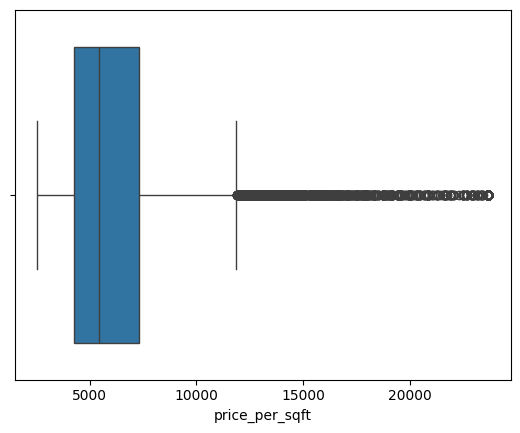

In [107]:
sns.boxplot(x=new_data['price_per_sqft'])

After Removing outliers


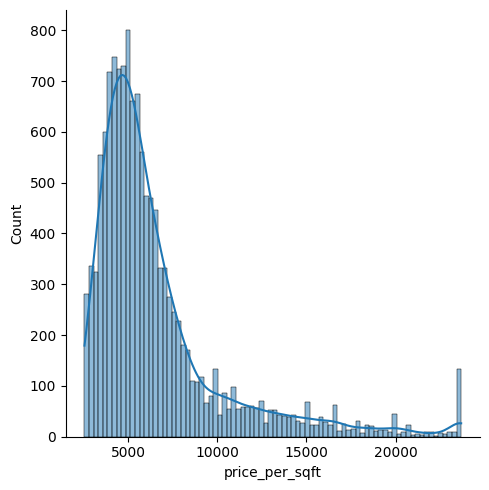

In [110]:
print('After Removing outliers')
sns.displot(x=new_data['price_per_sqft'], kde=True)


Before Removing outliers


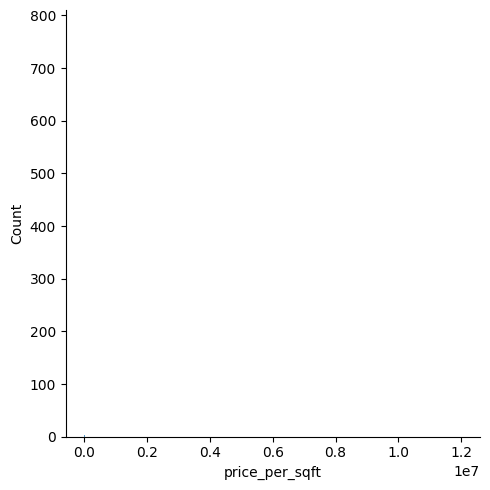

In [109]:
print('Before Removing outliers')
sns.displot(x=data['price_per_sqft'])

##Mean and Standard Deviation

Mean: 7920.336742424242
Standard Deviation: 106727.16032810845
Lower Threshold: -312261.1442419011
Upper Threshold: 328101.8177267496
Original Data Shape: (13200, 7)
Trimmed Data Shape: (13195, 7)
Number of Outliers Removed: 5


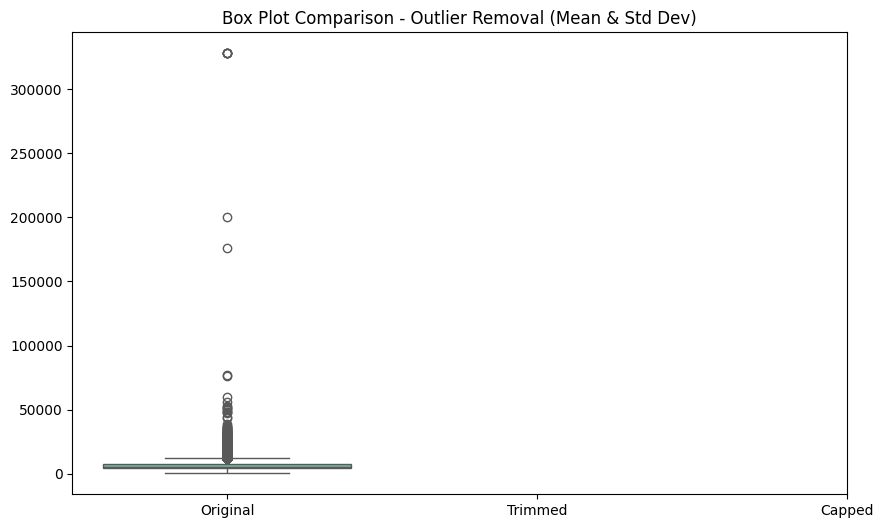

In [193]:


# Calculate mean and standard deviation
mean_value = data['price_per_sqft'].mean()
std_dev = data['price_per_sqft'].std()

# Define outlier thresholds
lower_threshold = mean_value - 3 * std_dev
upper_threshold = mean_value + 3 * std_dev

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Lower Threshold: {lower_threshold}")
print(f"Upper Threshold: {upper_threshold}")

# Option 1: Trimming - Remove rows with outliers
trimmed_data = data[(data['price_per_sqft'] >= lower_threshold) & (data['price_per_sqft'] <= upper_threshold)]

# Option 2: Capping - Replace outliers with thresholds
capped_data = data.copy()
capped_data['price_per_sqft'] = capped_data['price_per_sqft'].apply(
    lambda x: lower_threshold if x < lower_threshold else (upper_threshold if x > upper_threshold else x)
)

# Option 3: Imputation - Replace outliers with mean
mean_imputed_data = data.copy()
mean_imputed_data['price_per_sqft'] = mean_imputed_data['price_per_sqft'].apply(
    lambda x: mean_value if (x < lower_threshold or x > upper_threshold) else x
)

# Option 3: Imputation - Replace outliers with median
median_value = data['price_per_sqft'].median()
median_imputed_data = data.copy()
median_imputed_data['price_per_sqft'] = median_imputed_data['price_per_sqft'].apply(
    lambda x: median_value if (x < lower_threshold or x > upper_threshold) else x
)

# Print dataset shapes
print(f"Original Data Shape: {data.shape}")
print(f"Trimmed Data Shape: {trimmed_data.shape}")
print(f"Number of Outliers Removed: {data.shape[0] - trimmed_data.shape[0]}")

# Verify with Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['price_per_sqft'], trimmed_data['price_per_sqft'], capped_data['price_per_sqft']],
            palette="Set2")
plt.xticks([0, 1, 2], ['Original', 'Trimmed', 'Capped'])
plt.title("Box Plot Comparison - Outlier Removal (Mean & Std Dev)")
plt.show()




<Axes: xlabel='price_per_sqft'>

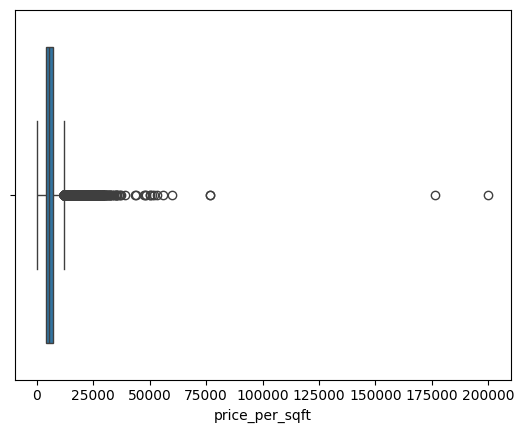

In [190]:
sns.boxplot(x=trimmed_data['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

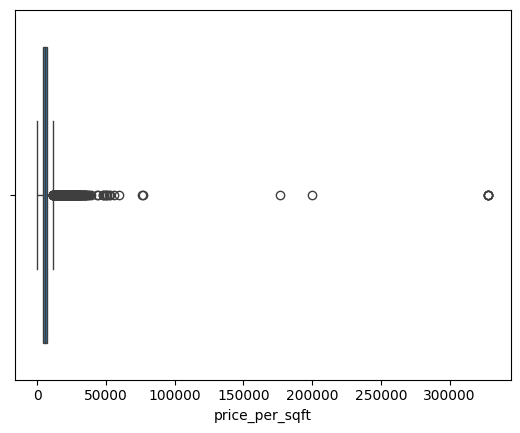

In [189]:
sns.boxplot(x=capped_data['price_per_sqft'])

In [123]:
mean_data = data['price_per_sqft'].mean()
std_dev_data = data['price_per_sqft'].std()
median_data = data['price_per_sqft'].median()

upper_limit = mean_data + 3*std_dev_data
lower_limit = mean_data - 3*std_dev_data
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)
print("Mean Value:", mean_data)
print("Standard Deviation:", std_dev_data)

upper limit: 328101.8177267496
lower limit: -312261.1442419011
Mean Value: 7920.336742424242
Standard Deviation: 106727.16032810845


In [121]:
#find outliers
data.loc[(data['price_per_sqft'] > upper_limit) | (data['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [140]:
#trimming- delete the outlier data
new_data = data.loc[(data['price_per_sqft']<= upper_limit) & (data['price_per_sqft']>= lower_limit)]
print("Before removing outliers:",len(data))
print("After removing outliers:", len(new_data))
print("outliers:",len(data)-len(new_data))

Before removing outliers: 13200
After removing outliers: 13195
outliers: 5


<Axes: xlabel='price_per_sqft'>

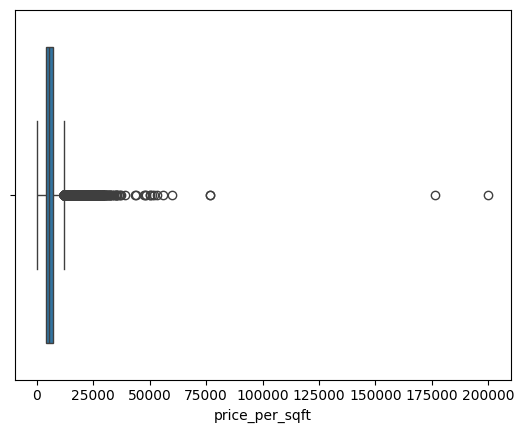

In [194]:
sns.boxplot(x=new_data['price_per_sqft'])

In [195]:
# Create a function to detect outliers and remove them based on the specified method
def remove_outliers(data, column, method):
    if method == "mean_std":
        mean = data[column].mean()
        std = data[column].std()
        return data[(data[column] >= mean - 3*std) & (data[column] <= mean + 3*std)]

    elif method == "percentile":
        lower_bound = np.percentile(data[column], 1)
        upper_bound = np.percentile(data[column], 99)
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    elif method == "iqr":
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        return data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    elif method == "zscore":
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        return data[(z_scores >= -3) & (z_scores <= 3)]

# Remove outliers from price_per_sqft using different methods
methods = ["mean_std", "percentile", "iqr", "zscore"]
outlier_removed_data = {}

for method in methods:
    outlier_removed_data[method] = remove_outliers(data, "price_per_sqft", method)
    print(f"After removing outliers using {method}, data shape: {outlier_removed_data[method].shape}")


After removing outliers using mean_std, data shape: (13195, 7)
After removing outliers using percentile, data shape: (12941, 7)
After removing outliers using iqr, data shape: (11935, 7)
After removing outliers using zscore, data shape: (13195, 7)


#Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

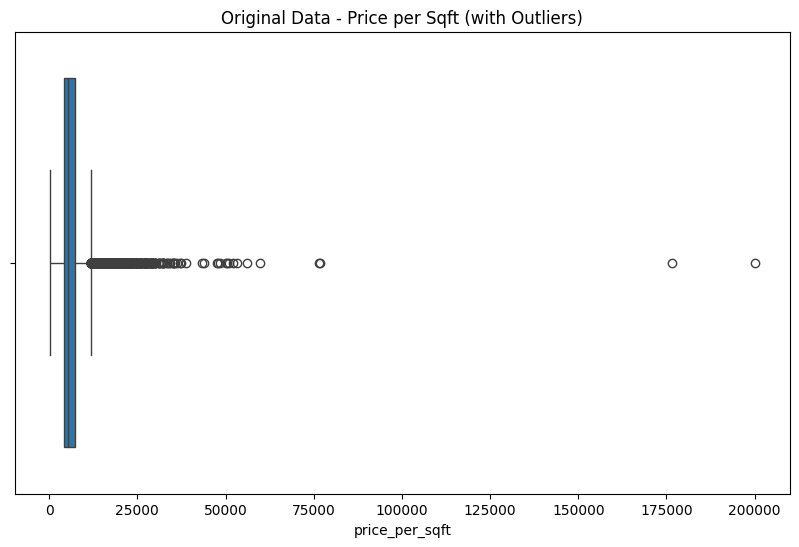

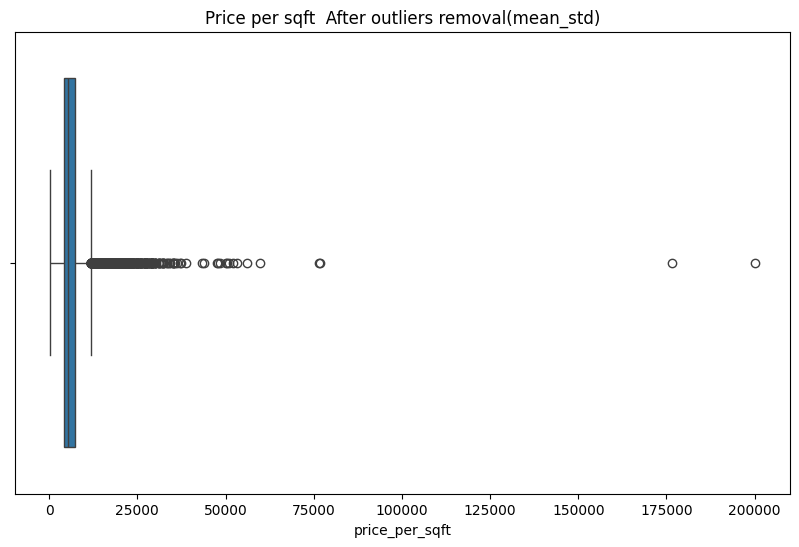

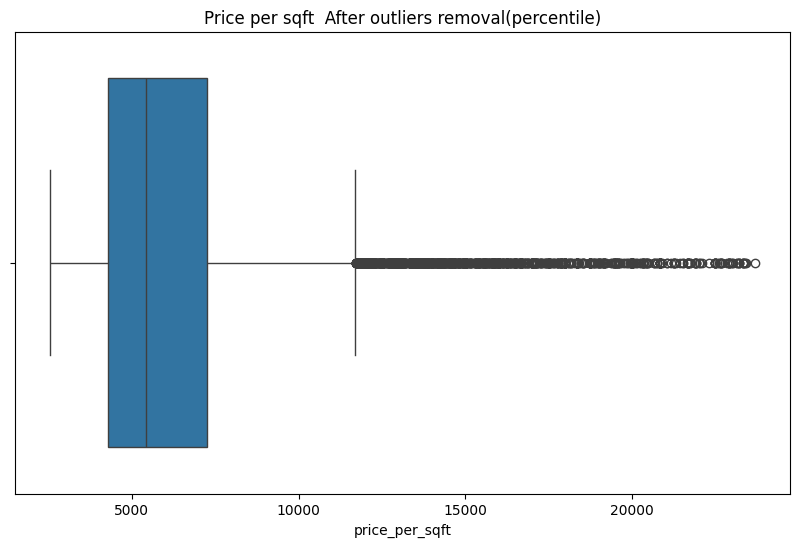

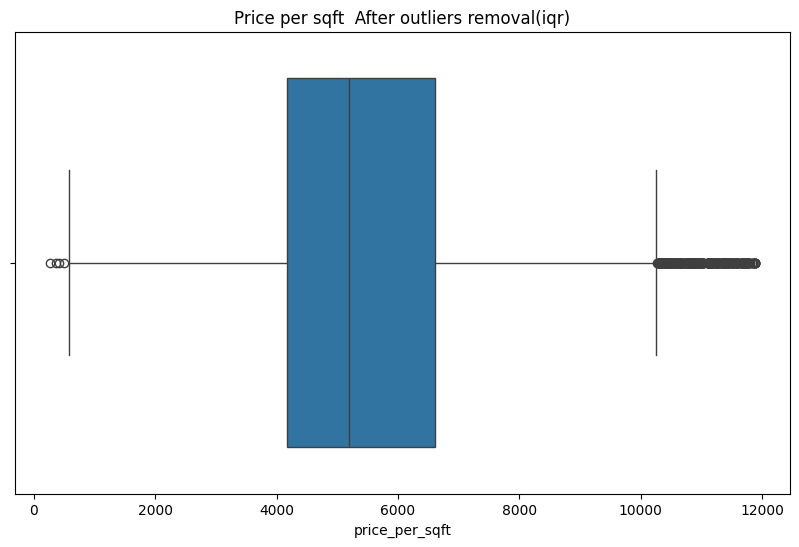

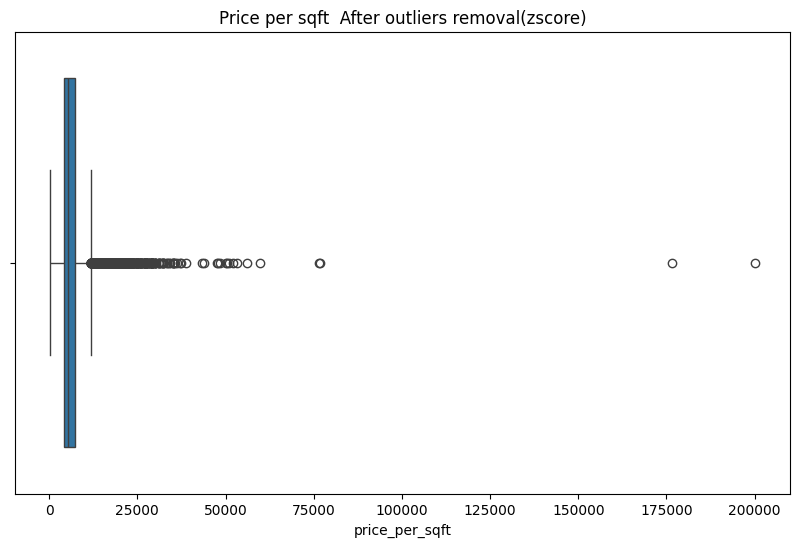

In [202]:
#create box plots to compare outlier removal methods
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x=data['price_per_sqft'])
plt.title("Original Data - Price per Sqft (with Outliers)")
plt.show()

for method, data in outlier_removed_data.items():
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x=data['price_per_sqft'])
    plt.title(f'Price per sqft  After outliers removal({method})')
    plt.show()

#Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.


Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


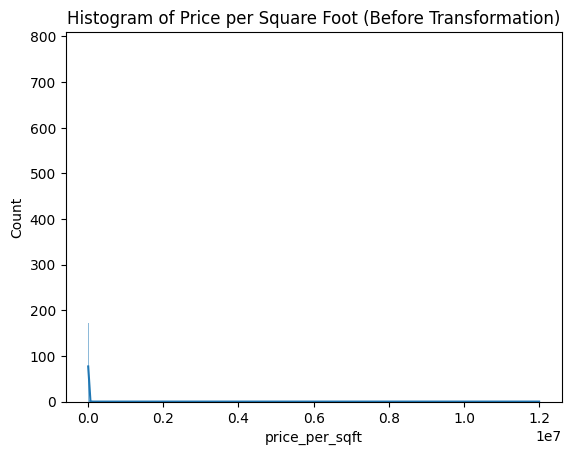


Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


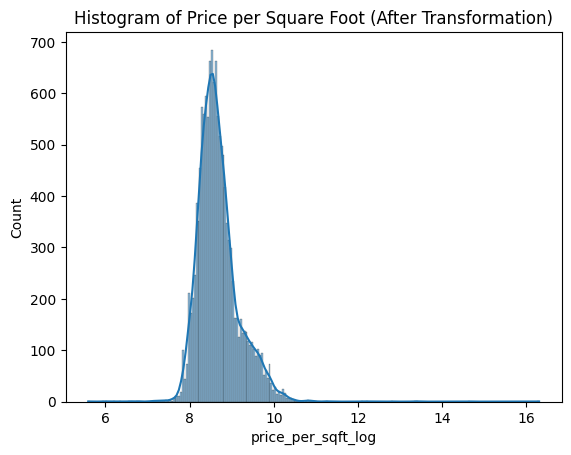

In [213]:
# Check skewness and kurtosis before transformation
print("\nSkewness before transformation:", skew(data['price_per_sqft']))
print("Kurtosis before transformation:", kurtosis(data['price_per_sqft']))

# Plot histogram to check normality
sns.histplot(data["price_per_sqft"], kde=True)
plt.title("Histogram of Price per Square Foot (Before Transformation)")
plt.show()

# Apply log transformation
data["price_per_sqft_log"] = np.log1p(data["price_per_sqft"])

# Check skewness and kurtosis after transformation
print("\nSkewness after transformation:", skew(data['price_per_sqft_log']))
print("Kurtosis after transformation:", kurtosis(data['price_per_sqft_log']))

# Plot histogram after transformation
sns.histplot(data["price_per_sqft_log"], kde=True)
plt.title("Histogram of Price per Square Foot (After Transformation)")
plt.show()



skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


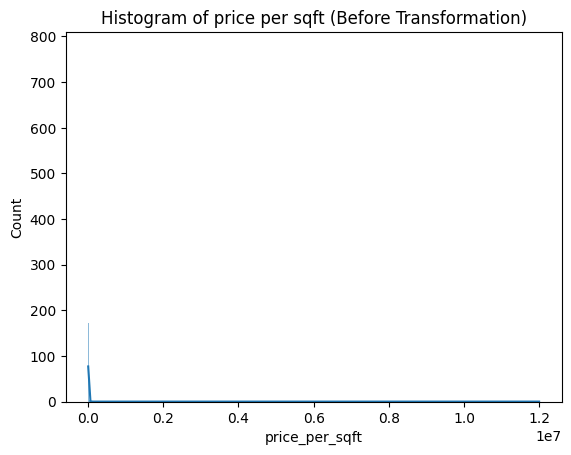


skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


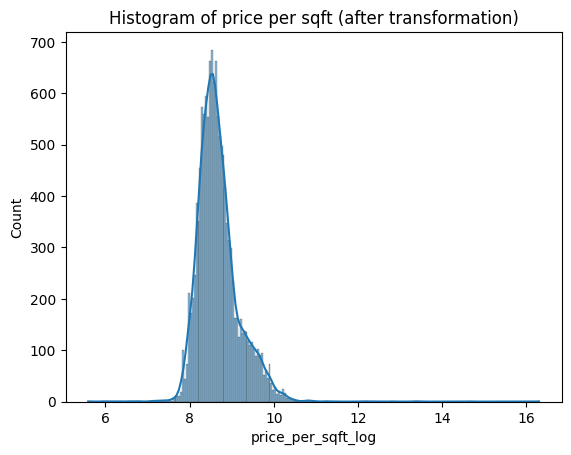

In [216]:
# Check skewness and kurtosis before transformation
print("\nskewness before transformation:", skew(data['price_per_sqft']))
print("Kurtosis before transformation:", kurtosis(data['price_per_sqft']))

#plot histogram to check normality
sns.histplot(data['price_per_sqft'],kde=True)
plt.title('Histogram of price per sqft (Before Transformation)')
plt.show()

#Apply log transformation
data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

# Check skewness and kurtosis after transformation
print("\nskewness after transformation:", skew(data['price_per_sqft_log']))
print("Kurtosis after transformation:", kurtosis(data['price_per_sqft_log']))

#plot histogram to after transformation
sns.histplot(data['price_per_sqft_log'],kde=True)
plt.title('Histogram of price per sqft (after transformation)')
plt.show()

#Q5. Check the correlation between all the numerical columns and plot heatmap.

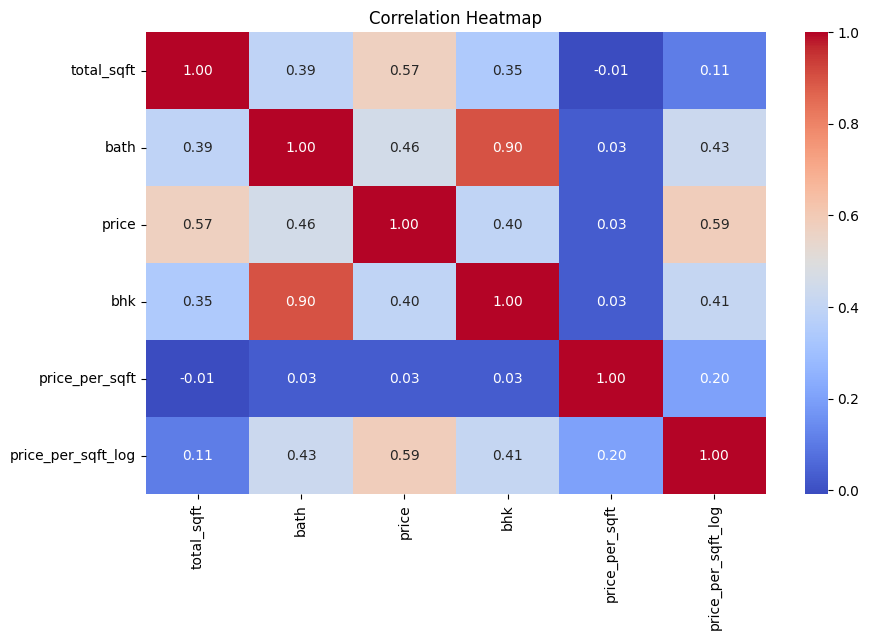

In [215]:
# Select only numeric columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric data
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Q6. Draw Scatter plot between the variables to check the correlation between them.

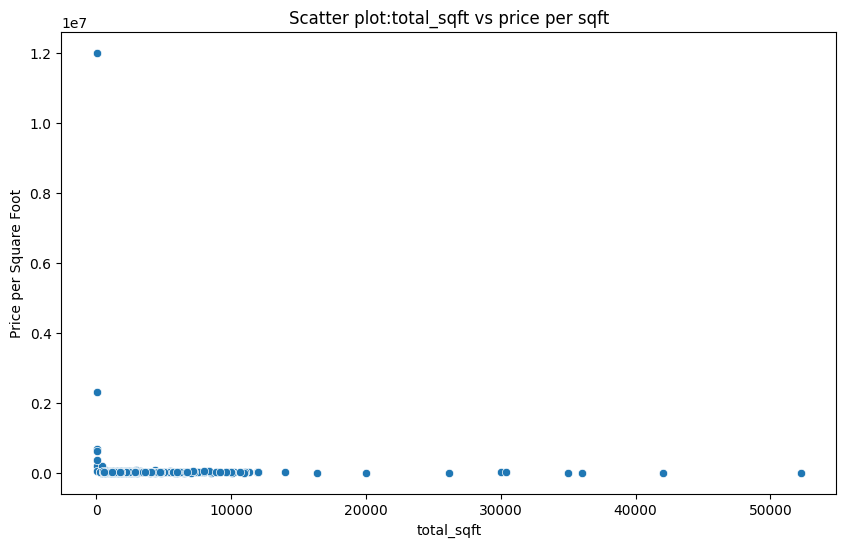

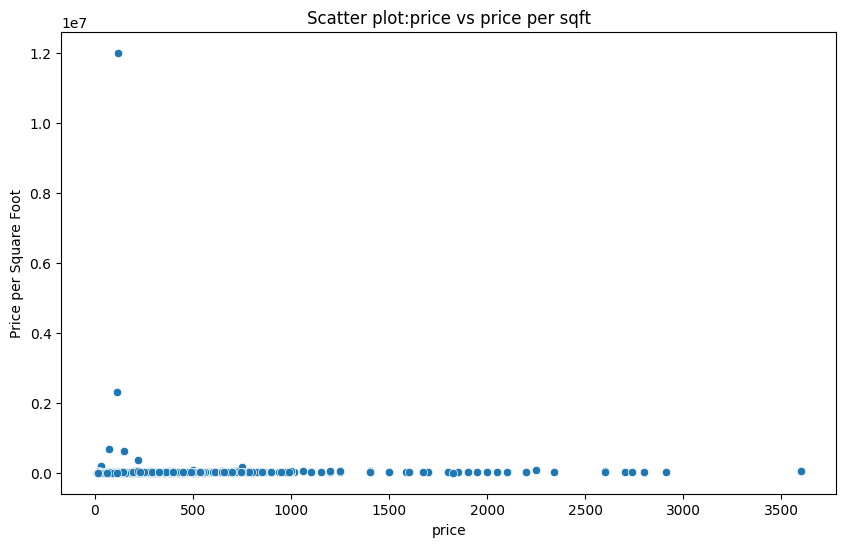

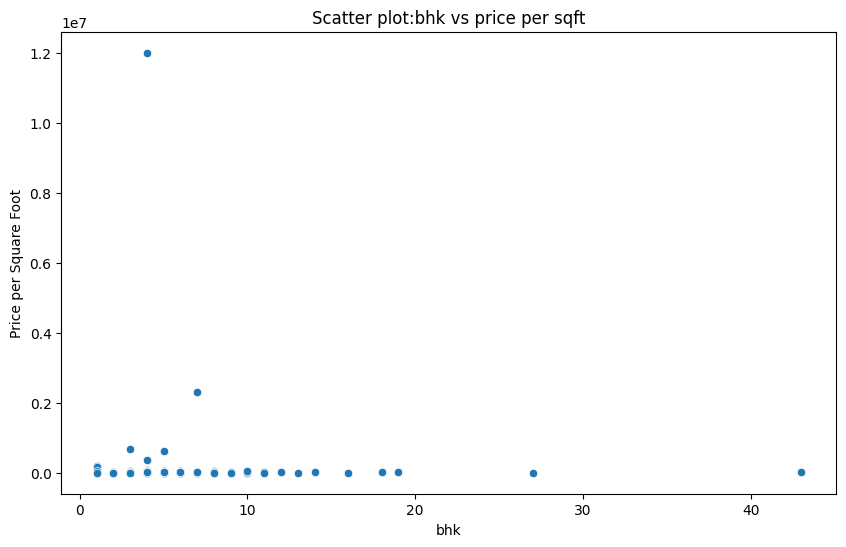

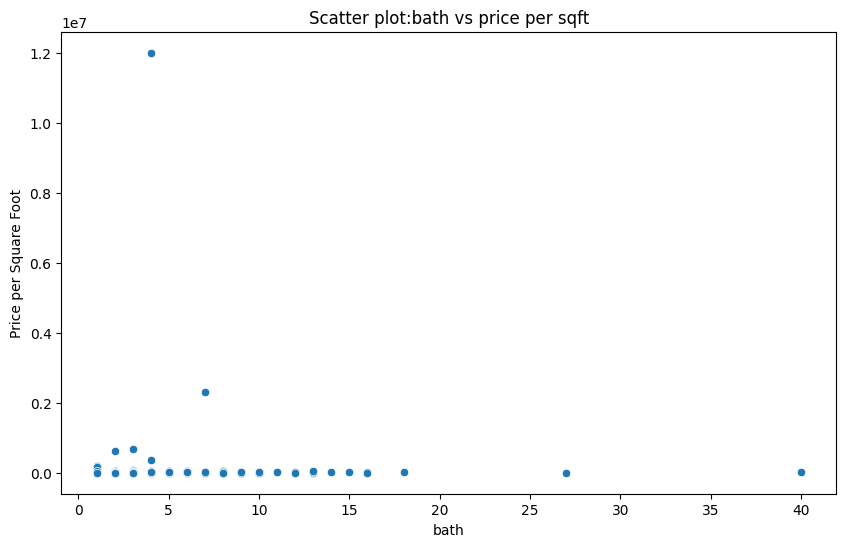

In [223]:
# Draw scatter plots to check correlations
Columns_to_plot = ['total_sqft','price','bhk','bath','price_per_sqft']

for col in Columns_to_plot:
    if col != 'price_per_sqft':
       plt.figure(figsize=(10, 6))
       sns.scatterplot(data=data, x=col, y='price_per_sqft')
       plt.title(f'Scatter plot:{col} vs price per sqft')
       plt.xlabel(col)
       plt.ylabel("Price per Square Foot")
       plt.show()